# The 5 Steps in K-means Clustering Algorithm <br>
Step 1. Randomly pick k data points as our initial Centroids.<br>
Step 2. Find the distance (Euclidean distance for our purpose) between each data points in our training set with the k centroids.<br>

Step 3. Now assign each data point to the closest centroid according to the distance found.<br>
Step 4. Update centroid location by taking the average of the points in each cluster group.<br>

Step 5. Repeat the Steps 2 to 4 till our centroids don’t change.<br>

We can choose optimal value of K (Number of Clusters) using methods like the The Elbow method.<br>

Import libarys

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from scipy.spatial.distance import cdist 

# Implemeting on Breast cancer data set

In [11]:
data = pd.read_csv('data.csv')
data.head()
data = data.drop(['diagnosis','Unnamed: 32'],axis=1)
data = data.to_numpy()

Implementing Alogrithm

In [21]:
#Function to implement steps given in previous section
distortions_2 = []
def kmeans__(x,k, no_of_iterations,dist_method):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1   
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,dist_method) #Step 2 # calculate paire wise distence
    #print(distances) 
    #Centroid with the minimum Distance
    #print([np.argmin(i) for i in distances])
    points = np.array([np.argmin(i) for i in distances]) #Step 3
    #print(points) 
    #Repeating the above steps for a defined number of iterations
    #Step 4
   # print(centroids)
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
        #print(centroids) 
        distances = cdist(x, centroids, dist_method)
        points = np.array([np.argmin(i) for i in distances])
        distortions_2.append(sum(np.min(cdist(x, centroids,dist_method),axis = 1)) / x.shape[0])
    return points

Define Elbow method

In [22]:
def elobow(k_val,num_itt):
    k_val = k_val +1
    m = []
    for K in range(1,k_val):
        kmeans__(data,K,num_itt,'euclidean')
        avg = np.mean(distortions_2)
        m.append(avg)    
    K = np.arange(1,k_val)
    plt.plot(K, m, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

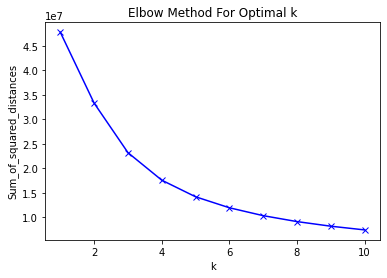

In [23]:
elobow(10,300)

using won code

In [33]:
# we obtained k = 4 will be best fit
lable = kmeans__(data,4,500,'euclidean')

Output using libary method

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, random_state = 42)
lable1 = kmeans.fit_predict(data)

Cheaking cluster valdating using davies_bouldin_score

In [35]:
from sklearn.metrics import davies_bouldin_score

print(davies_bouldin_score(data, label))
print(davies_bouldin_score(data, lable1))

0.04252743860084537
0.030357240801952082


Remakes : our method works prety good and not much deffer from libary method